In [18]:
import numpy as np
from numpy import sqrt, sin, log, exp
import matplotlib.pyplot as plt
from scipy.special import p_roots

# other project files
import modes
import spectra
import util

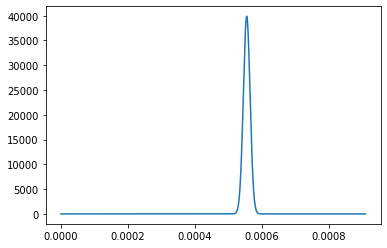

0.9999987740400736


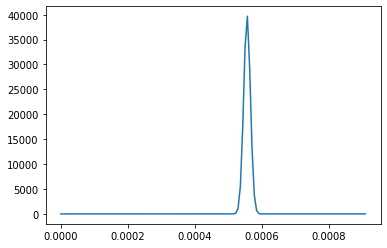

In [165]:
n_quad = 200
x_gauss, w_gauss = p_roots(n_quad)
a_gauss = x_gauss *  (a_rec - a0)/2 + (a_rec - a0)/2

# numerical parameters
NT = 2**13

a0 = 1.e-6
a0_pca = 5.e-5
a_rec = 1/1100

A = np.linspace(a0, a_rec, 2*NT)

width = .00001
delta_w = (width * sqrt(2*np.pi))**-1 * np.exp(
        -.5*(A[::2] - A[10000])**2 / (width)**2)
plt.plot(A[::2],delta_w)
plt.show()

F = util.trapz(A[::2],delta_w)
f = np.interp(a_gauss,A[::2],delta_w)
plt.plot(a_gauss,f)
f_I = np.dot(f, w_gauss) * (a_rec - a0)/2
print(f_I)

In [117]:
@numba.njit(parallel=True)
def W_PCA_gq(n, s, t, a0):
    """W PCA with interpolation
    - n (int) order of gaussian quadrature.
    - s (int): sharpness parameter.
    """
    
    x_gauss, w_gauss = p_roots(n)
    a_gauss = x_gauss *  (a_rec - a0)/2 + (a_rec - a0)/2
    width = NT//n * 2**s
    width = (a_rec-a0)/n * 2**s
    ss = 0.1**t # derivative step size

    # initialize an empty array to hold the partial derivatives
    J = np.zeros((len(L_eval), n))
    print('computing derivatives')
    for i in range(i):
        # perturb w around the quadrature points
        Delta_w = ss * (width * sqrt(2*np.pi))**-1 * np.exp(
                -.5*(A[::2] - a_gauss[i])**2 / (width)**2
        
        Cl_fwd = spectra.get_Cl_2fld(L, L_eval, X, JLX, DJLX, A[::2], K, wD+Delta_w, cs2D,
                                     deltaD[0], vD[0], OmegaB0, OmegaC0, OmegaG0, OmegaN0,
                                     As, TCMB0, h)
        Cl_bwd = spectra.get_Cl_2fld(L, L_eval, X, JLX, DJLX, A[::2], K, wD-Delta_w, cs2D,
                                     deltaD[0], vD[0], OmegaB0, OmegaC0, OmegaG0, OmegaN0,
                                     As, TCMB0, h)
            
        # The result goes in the nth column of J.
        J[:, n] = (Cl_fwd - Cl_bwd)/(2.*ss)
    print('computing eigenfunctions')
            
    # compute the singular values and principal components.
    SV, PV, err = util.Powit(J,np.diag(1/Sigma),10,np.random.rand(NC,10))
    PC = np.zeros((5, NT))
            
    # now do some fancy interpolation
    
        
    #pickle.dump(PC, open("output/w-only/PC_interp.p", "wb"))
    #pickle.dump(SV, open("output/w-only/SV_interp.p", "wb"))
    print('\n','PCs and SVs saved')
    
    return SV, PC
    


In [ ]:
    # initialize an empty array to hold the partial derivatives
    J = np.zeros((len(L_eval), NC))
    print('computing derivatives')
    for n in range(NC):
        # Take the central-difference derivative of Cl with respect to the nth basis coefficient.
        Delta_w = ss*B[n]
        Cl_fwd = spectra.get_Cl_2fld(L, L_eval, X, JLX, DJLX, A[::2], K, wD+Delta_w, cs2D,
                                     deltaD[0], vD[0], OmegaB0, OmegaC0, OmegaG0, OmegaN0,
                                     As, TCMB0, h)
        Cl_bwd = spectra.get_Cl_2fld(L, L_eval, X, JLX, DJLX, A[::2], K, wD-Delta_w, cs2D,
                                     deltaD[0], vD[0], OmegaB0, OmegaC0, OmegaG0, OmegaN0,
                                     As, TCMB0, h)
        # The result goes in the nth column of J.
        J[:, n] = (Cl_fwd - Cl_bwd)/(2.*ss)
    return a1*a2

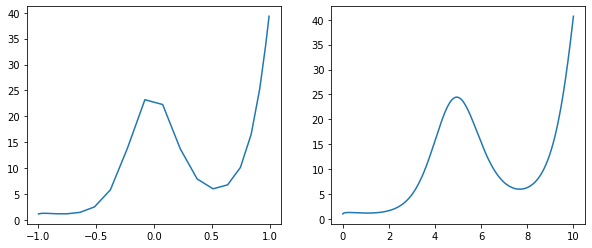

gaussian quadrature:  107.63936437439949
trapezoidal rule:  107.63911684824917


In [98]:
a = 0
b = 10

def f(x):
    return exp(sqrt(x)-sin(x))

def f_remap(x, a, b):
    return f(
        x*(b-a)/2 + (a+b)/2
    )
x = np.linspace(0,10,1000)


fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(x_gauss,f_remap(x_gauss, a, b))
ax[1].plot(x, f(x))
plt.show()
f_int = np.dot(f_remap(x_gauss, a, b), w) * (b-a)/2
F = util.trapz(x,f(x))
print("gaussian quadrature: ",f_int)
print("trapezoidal rule: ", F[-1])